# Домашнее задание 9. Инструменты разметки наборов данных

## Задание 1.

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

## Источник датасета:

https://www.kaggle.com/datasets/coltonbarger/rotten-tomatoes-reviews-for-online-streaming-shows

## Описание датасета: Rotten Tomatoes Reviews for Online Streaming Shows

### About Dataset

This is a collection of both critic and audience reviews for 685 different online streaming shows off of Rotten Tomatoes. The data was scraped the week of July 10, 2022. Reviews found in the files are previews in most cases, especially when the critic review is long. There are also duplicates of some reviews in the case that a show may be found on more than one online streaming service (either paid or with a subscription).

Data was collected for the top 100 most popular shows from 9 streaming platforms: 'Apple TV+', 'Paramount+', 'HBO MAX', 'Disney+', 'Prime Video', 'Hulu', 'Netflix', 'Peacock', and 'VUDU'. In most cases, there are not 100 shows that show up with reviews for each service. Why is this? Well, a lot of shows just didn't have reviews by either critics or audience members. Some services also don't have 100 shows yet due to being newer. This is the case with Apple TV+ for instance. Additionally, Rotten Tomatoes apparently goes down for maintenance a lot. This affected the collection of reviews greatly, and I am not sure if I got every single one. Oh well.

### About the Files

__tv_show_links.csv__: This file is essentially a list of all shows whose data was scraped. Other information includes the network (or networks in some cases) a show can be found on, the percentage of critics who had positive reviews, the percentage of audience members who had positive reviews, and the Rotten Tomatoes link the reviews can be found at (mostly was used during scraping, not sure what use it would have in any data analysis).

__audience_reviews.csv__: This is the file that contains audience reviews. The columns are the show that is reviewed, the rating (on a scale from 0-5), and the review text.

__critic_reviews.csv__: The file that contains critic reviews. The columns are the reviewed show, the sentiment the critic has (1 for positive, 0 for negative), and the review text.

In [91]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [95]:
reviews = pd.read_csv("critic_reviews.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
reviews.head()

,Show,Sentiment,Review
0,Mare of Easttown,1,I’m not sure I have engaged in appointment vie...
1,Mare of Easttown,1,Kate is marvelous; she truly is Mare. She disa...
2,Mare of Easttown,1,That’s the thing I’ve loved most about Mare: t...
3,Mare of Easttown,1,"Boasting Kate Winslet in the title role, twist..."
4,Mare of Easttown,1,"Performances in which madness, psychopathy or ..."


In [96]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14791 entries, 0 to 14790
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       14791 non-null  object
 1   Sentiment  14791 non-null  int64 
 2   Review     14790 non-null  object
dtypes: int64(1), object(2)
memory usage: 346.8+ KB


<AxesSubplot:>

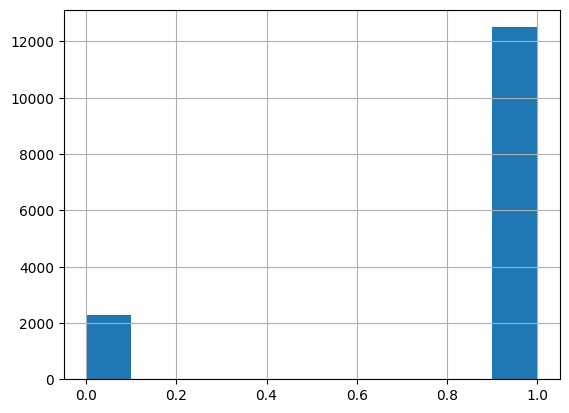

In [98]:
reviews['Sentiment'].hist()

## Задание 2.

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [106]:
# размеченное и неразмеченное подмножества данных
reviews = shuffle(reviews)
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.5, random_state=42)
labeled_reviews

,Show,Sentiment,Review
4315,Winning Time: The Rise of the Lakers Dynasty,1,"This isn’t a game-changing drama, but it’s an ..."
5260,Rome,1,Over two seasons... Rome is an intricately plo...
7904,Better Call Saul,1,We should thank our lucky stars to have lived ...
14587,Warehouse 13,1,"You have my attention now, Warehouse 13."
12803,All of Us Are Dead,1,"The series is not really elevated and, at 12 h..."
...,...,...,...
8728,Invincible,1,While the first three episodes made available ...
8145,The Chosen,1,The first season of The Chosen offered one of ...
3070,The Staircase,1,Michael and Kathleen are played by Colin Firth...
9434,The Haunting of Hill House,1,What makes this rendition of Jackson's story s...


In [107]:
labeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7395 entries, 4315 to 5408
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7395 non-null   object
 1   Sentiment  7395 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [108]:
unlabeled_reviews.head()

,Show,Sentiment,Review
239,Severance,1,Severance’s entire cast is a symphony without ...
12662,The Queen's Gambit,1,"The Queen's Gambit is watchable, but lacks the..."
2291,The Twilight Zone,1,"But better is a relative term, and it's import..."
2622,Limitless,0,There's a story to be told about what it means...
11612,Ozark,1,Powered by solid performances by the ever-reli...


In [109]:
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7396 entries, 239 to 7453
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7396 non-null   object
 1   Sentiment  7396 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [117]:
# Обучение модели на размеченных данных
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['Review'])
    y = labeled_data['Sentiment']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_reviews)

In [122]:
unlabeled_reviews = unlabeled_reviews.dropna()
unlabeled_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7395 entries, 239 to 7453
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7395 non-null   object
 1   Sentiment  7395 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [123]:
x_unlabeled = vect.transform(unlabeled_reviews['Review'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [124]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)
print(uncertainty)

[0.64761418 0.9085156  0.41273822 ... 0.74439169 0.3792589  0.52211456]


In [127]:
# Выбираем 100 самых неопределенных точек данных, разметку которых нужно выполнить вручную
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]
labeled_reviews_new


,Show,Sentiment,Review
8818,You,1,You season three still remains television wort...
2667,RENO 911!,1,A perfect balance between vulgarity and smart ...
32,Mare of Easttown,1,"It constantly surprises and overwhelms you, bu..."
2951,We Own This City,1,If you're a fan of The Wire (as I am) and cons...
871,Defending Jacob,1,It's a well-done drama that will keep you gues...
...,...,...,...
6545,WandaVision,1,"WandaVision is clever, delightful, and a fun M..."
11935,Hellbound,1,"Vibrant, haunting, horrifying and thought-prov..."
12307,Sex Education,1,"It'll make you laugh, it'll make you cry, and ..."
3724,The Leftovers,1,The Leftovers cemented its legacy as one of th...


## Задача 3.

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [128]:
labeled_reviews_new.to_csv('temp.csv', index=False) # сохранение данных для ручной разметки

In [130]:
# загрузка данных после ручной разметки
labeled_reviews_new = pd.read_csv("temp.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
labeled_reviews_new

,Show,Sentiment,Review
0,You,1,You season three still remains television wort...
1,RENO 911!,1,A perfect balance between vulgarity and smart ...
2,Mare of Easttown,1,"It constantly surprises and overwhelms you, bu..."
3,We Own This City,1,If you're a fan of The Wire (as I am) and cons...
4,Defending Jacob,1,It's a well-done drama that will keep you gues...
...,...,...,...
95,WandaVision,1,"WandaVision is clever, delightful, and a fun M..."
96,Hellbound,1,"Vibrant, haunting, horrifying and thought-prov..."
97,Sex Education,1,"It'll make you laugh, it'll make you cry, and ..."
98,The Leftovers,1,The Leftovers cemented its legacy as one of th...


## Задача 4.

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [131]:
labeled_reviews_united = pd.concat([labeled_reviews, labeled_reviews_new])


In [132]:
labeled_reviews_united

,Show,Sentiment,Review
4315,Winning Time: The Rise of the Lakers Dynasty,1,"This isn’t a game-changing drama, but it’s an ..."
5260,Rome,1,Over two seasons... Rome is an intricately plo...
7904,Better Call Saul,1,We should thank our lucky stars to have lived ...
14587,Warehouse 13,1,"You have my attention now, Warehouse 13."
12803,All of Us Are Dead,1,"The series is not really elevated and, at 12 h..."
...,...,...,...
95,WandaVision,1,"WandaVision is clever, delightful, and a fun M..."
96,Hellbound,1,"Vibrant, haunting, horrifying and thought-prov..."
97,Sex Education,1,"It'll make you laugh, it'll make you cry, and ..."
98,The Leftovers,1,The Leftovers cemented its legacy as one of th...


## Задача 5.

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [133]:
model, vect = train_model(labeled_reviews_united)

In [134]:
reviews_test = unlabeled_reviews
reviews_test

,Show,Sentiment,Review
239,Severance,1,Severance’s entire cast is a symphony without ...
12662,The Queen's Gambit,1,"The Queen's Gambit is watchable, but lacks the..."
2291,The Twilight Zone,1,"But better is a relative term, and it's import..."
2622,Limitless,0,There's a story to be told about what it means...
11612,Ozark,1,Powered by solid performances by the ever-reli...
...,...,...,...
4429,Boardwalk Empire,1,"The current season had some missteps, but the ..."
5928,And Just Like That...,0,Far too many 2021 cultural touchstones and new...
8900,The Wheel of Time,1,When it comes to adapting for the modern audie...
5084,His Dark Materials,1,Season Two may lack the spectacle of Season On...


In [135]:
x_test = vect.transform(reviews_test['Review'])
y_test_predicted = model.predict(x_test)
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1])

## Задача 6.

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [137]:
f1 = f1_score(reviews_test['Sentiment'], y_test_predicted)
f1

0.91528165906751